<a href="https://colab.research.google.com/github/rohailkhan/Aj_Machine_learning_master/blob/main/5_6_9_Pima_Indians.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pima=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv',header=None)
pima.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv',header=None,names=names)

pima.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# class distribute
pima.head(3)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
pima.groupby('class').size()

class
0    500
1    268
dtype: int64

## Pearson Correlation between features

In [ ]:
correlations=pima.corr(method='pearson')
pd.set_option('precision',2)
print(correlations)

       preg  plas  pres  skin  test  mass  pedi   age  class
preg   1.00  0.13  0.14 -0.08 -0.07  0.02 -0.03  0.54   0.22
plas   0.13  1.00  0.15  0.06  0.33  0.22  0.14  0.26   0.47
pres   0.14  0.15  1.00  0.21  0.09  0.28  0.04  0.24   0.07
skin  -0.08  0.06  0.21  1.00  0.44  0.39  0.18 -0.11   0.07
test  -0.07  0.33  0.09  0.44  1.00  0.20  0.19 -0.04   0.13
mass   0.02  0.22  0.28  0.39  0.20  1.00  0.14  0.04   0.29
pedi  -0.03  0.14  0.04  0.18  0.19  0.14  1.00  0.03   0.17
age    0.54  0.26  0.24 -0.11 -0.04  0.04  0.03  1.00   0.24
class  0.22  0.47  0.07  0.07  0.13  0.29  0.17  0.24   1.00


### Correction Matrix plot

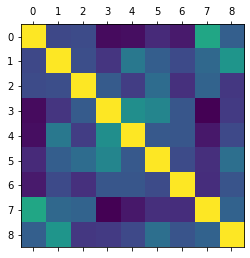

In [ ]:
plt.matshow(correlations)
plt.show()

### Check skewness

In [ ]:
print(pima.skew())

preg     0.90
plas     0.17
pres    -1.84
skin     0.11
test     2.27
mass    -0.43
pedi     1.92
age      1.13
class    0.64
dtype: float64


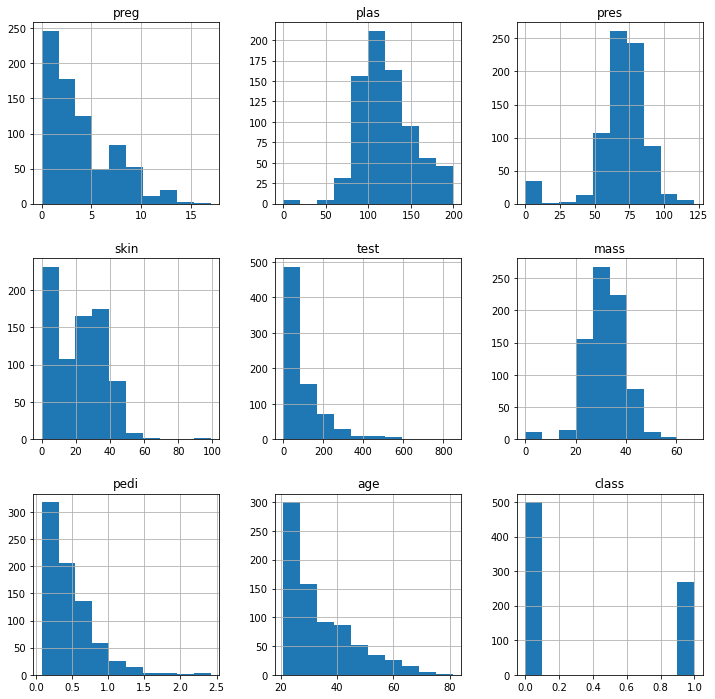

In [ ]:
pima.hist(figsize=(12,12))
plt.show()

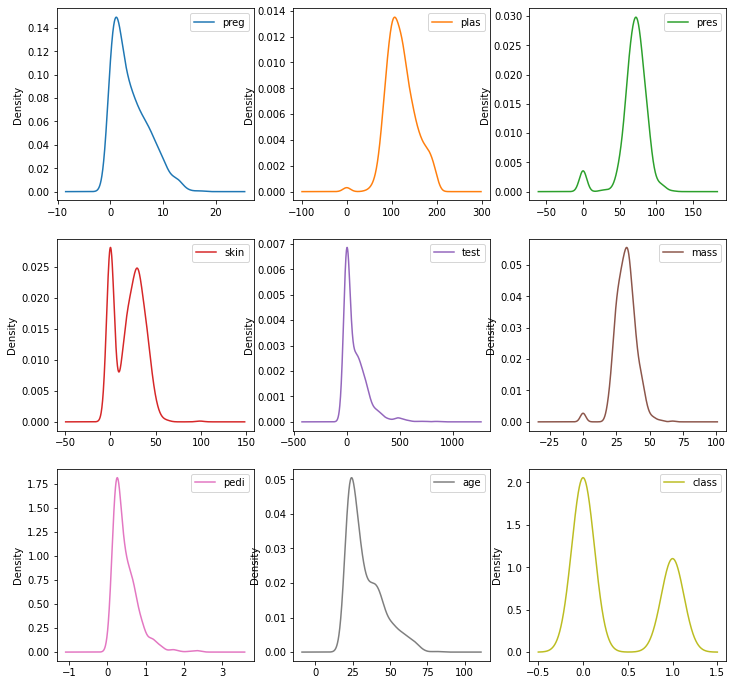

In [ ]:
pima.plot(kind='density',subplots=True,layout=(3,3),sharex=False,figsize=(12,12))
plt.show()

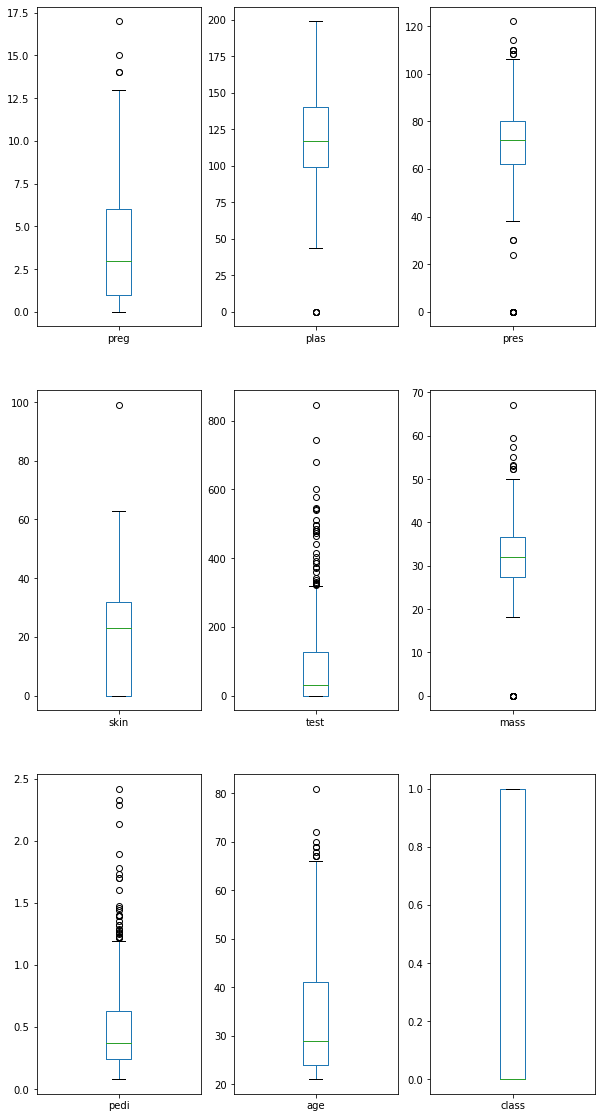

In [ ]:
pima.plot(kind='box',subplots=True,layout=(3,3),sharex=False,figsize=(10,20) )
plt.show()

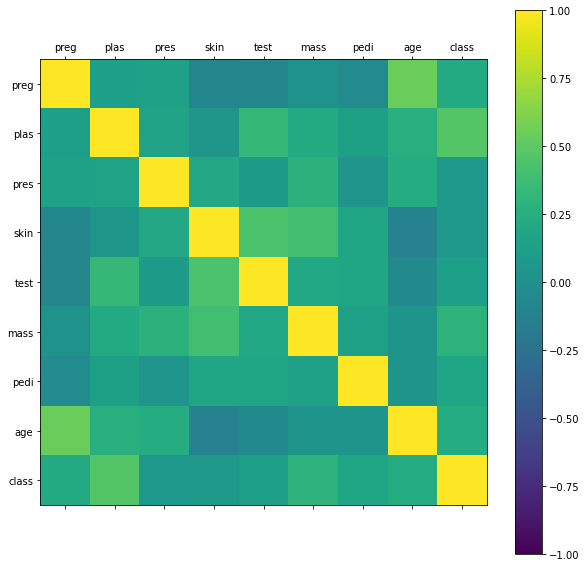

In [ ]:
correlations = pima.corr()
# plot correlation matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

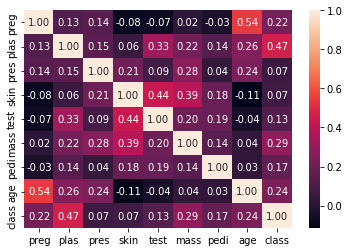

In [ ]:
import seaborn as sns
sns.heatmap(correlations,annot=True,fmt='0.2f')
plt.show()

In [ ]:
correlations.shape

(9, 9)

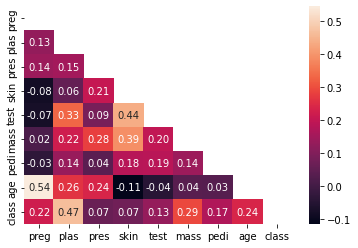

In [ ]:
import seaborn as sns
sns.heatmap(correlations,annot=True,fmt='0.2f' ,mask=~np.tri(correlations.shape[1],k=-1,dtype=bool))
plt.show()

In [ ]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv',header=None,names=names)
pima1=pima.drop('class',axis=1)

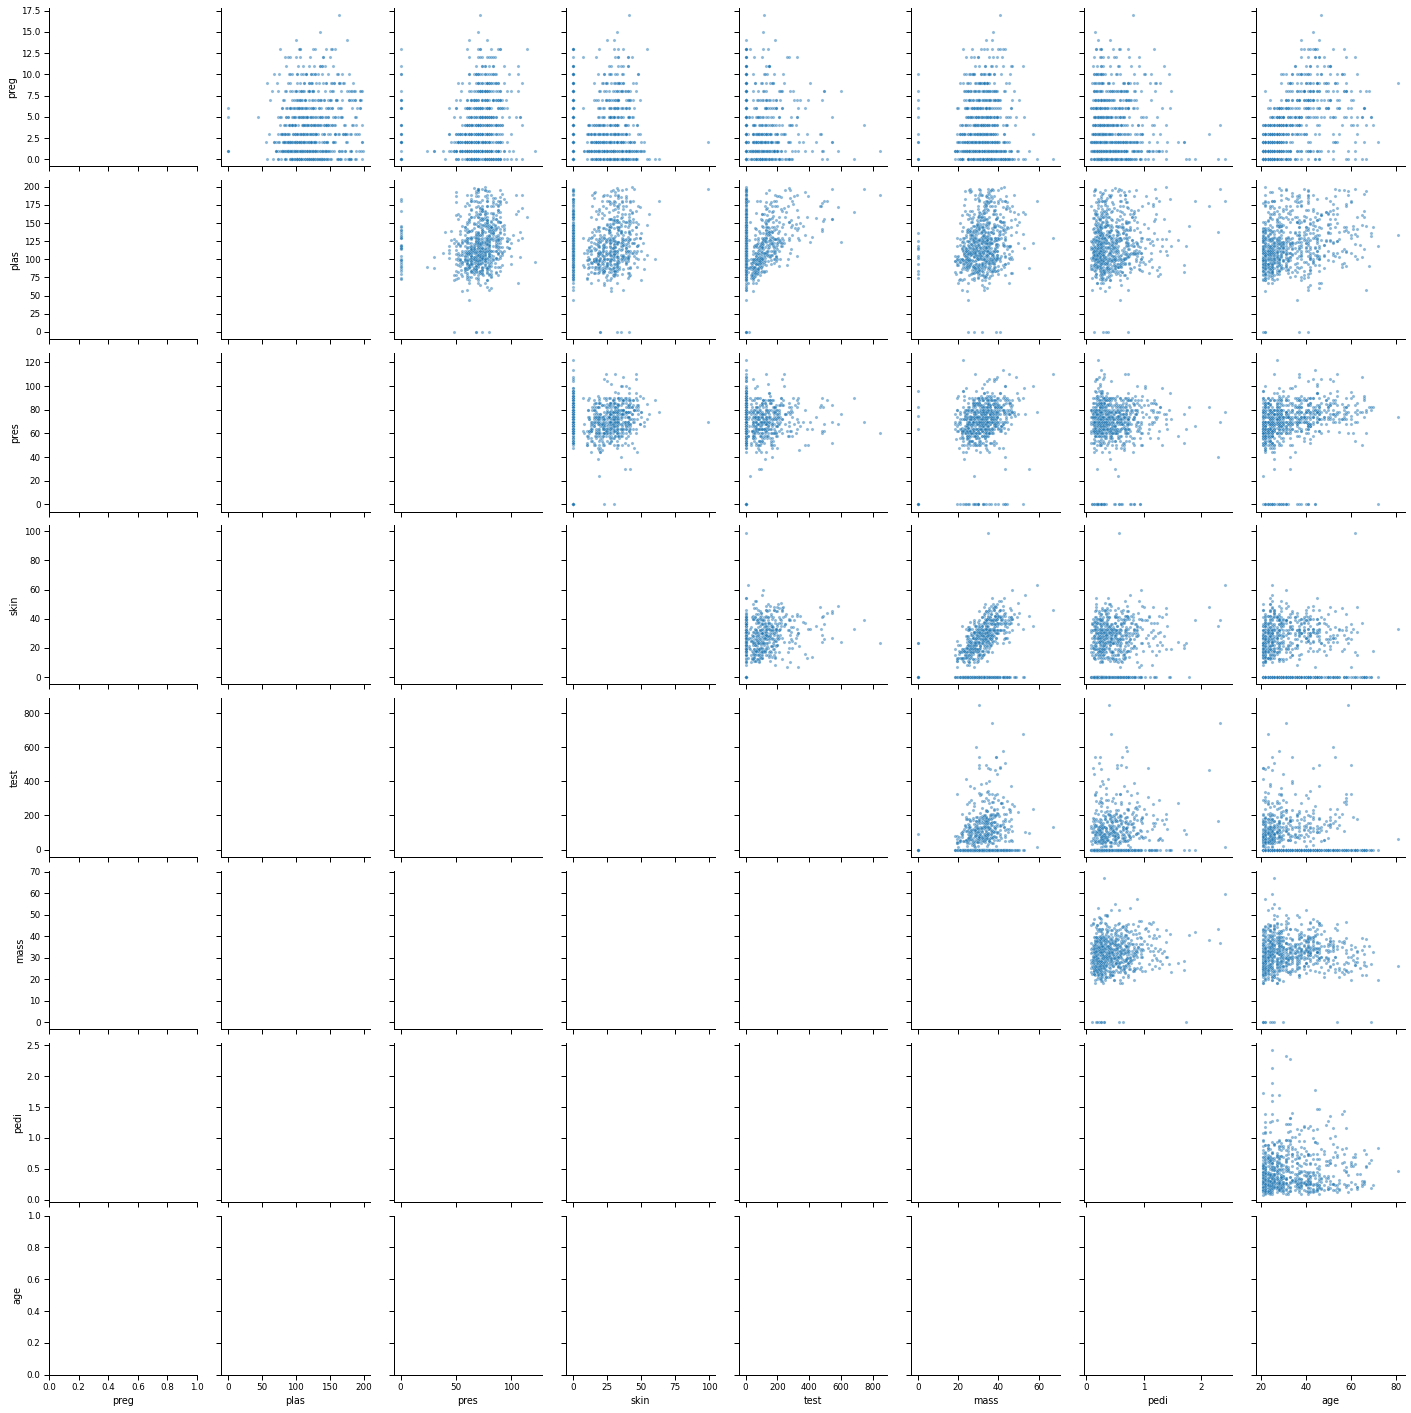

In [ ]:
sns.set_context('paper')
g = sns.PairGrid(pima1)
g.map_upper(sns.scatterplot, linewidths=1, edgecolor="w", s=10,
alpha=0.5)
plt.show()

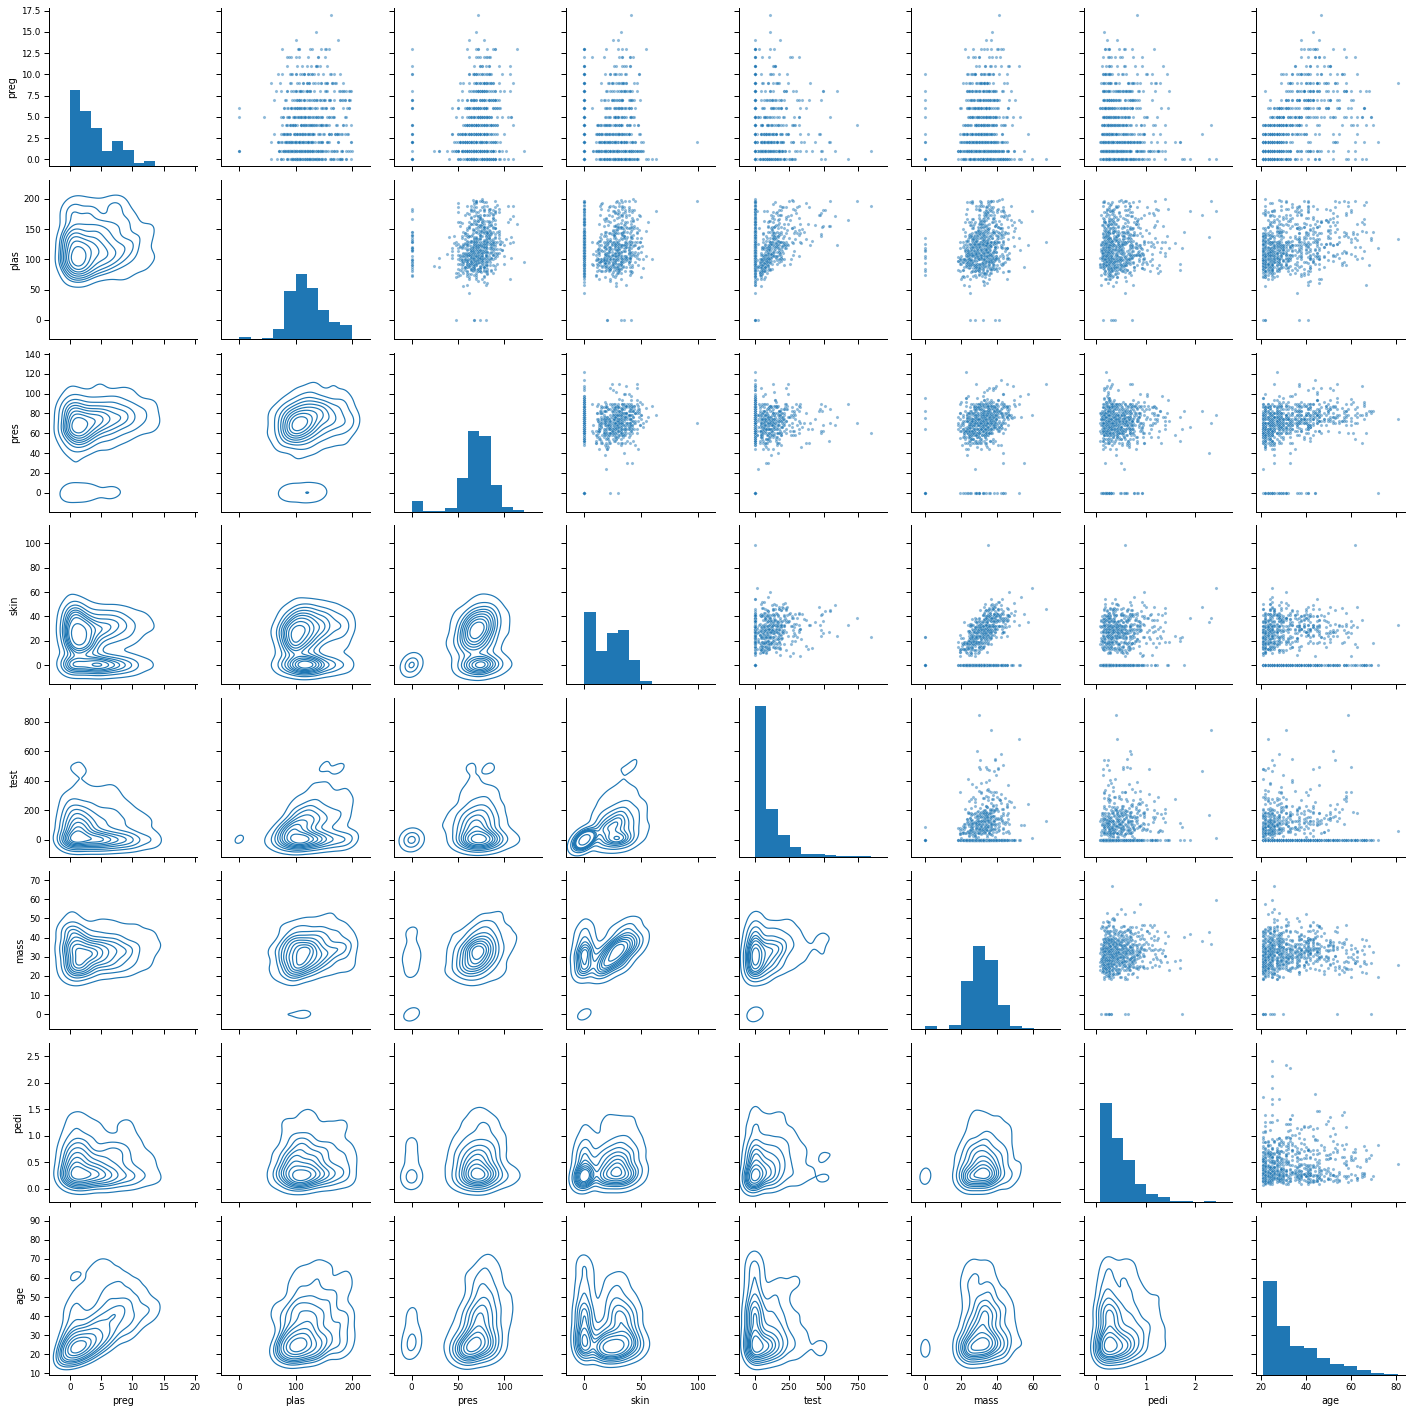

In [ ]:
sns.set_context('paper')
g = sns.PairGrid(pima1)
g.map_upper(sns.scatterplot, linewidths=1, edgecolor="w", s=10,
alpha=0.5)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot)
plt.show()

In [ ]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv',header=None,names=names)
pima1=pima.drop('class',axis=1)

In [ ]:
# the following parameters are highly skewed
# age,pedi,  preg
pima1['log_age']=pima1.age.apply(np.log)
pima1['log_pedi']=pima1.pedi.apply(np.log)


In [ ]:
pima2=pima1.drop(['age','pedi'],axis=1)

In [ ]:
pima2.describe()

,preg,plas,pres,skin,test,mass,log_age,log_pedi
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,3.45,-0.96
std,3.37,31.97,19.36,15.95,115.24,7.88,0.32,0.64
min,0.00,0.00,0.00,0.00,0.00,0.00,3.04,-2.55
25%,1.00,99.00,62.00,0.00,0.00,27.30,3.18,-1.41
50%,3.00,117.00,72.00,23.00,30.50,32.00,3.37,-0.99
75%,6.00,140.25,80.00,32.00,127.25,36.60,3.71,-0.47
max,17.00,199.00,122.00,99.00,846.00,67.10,4.39,0.88


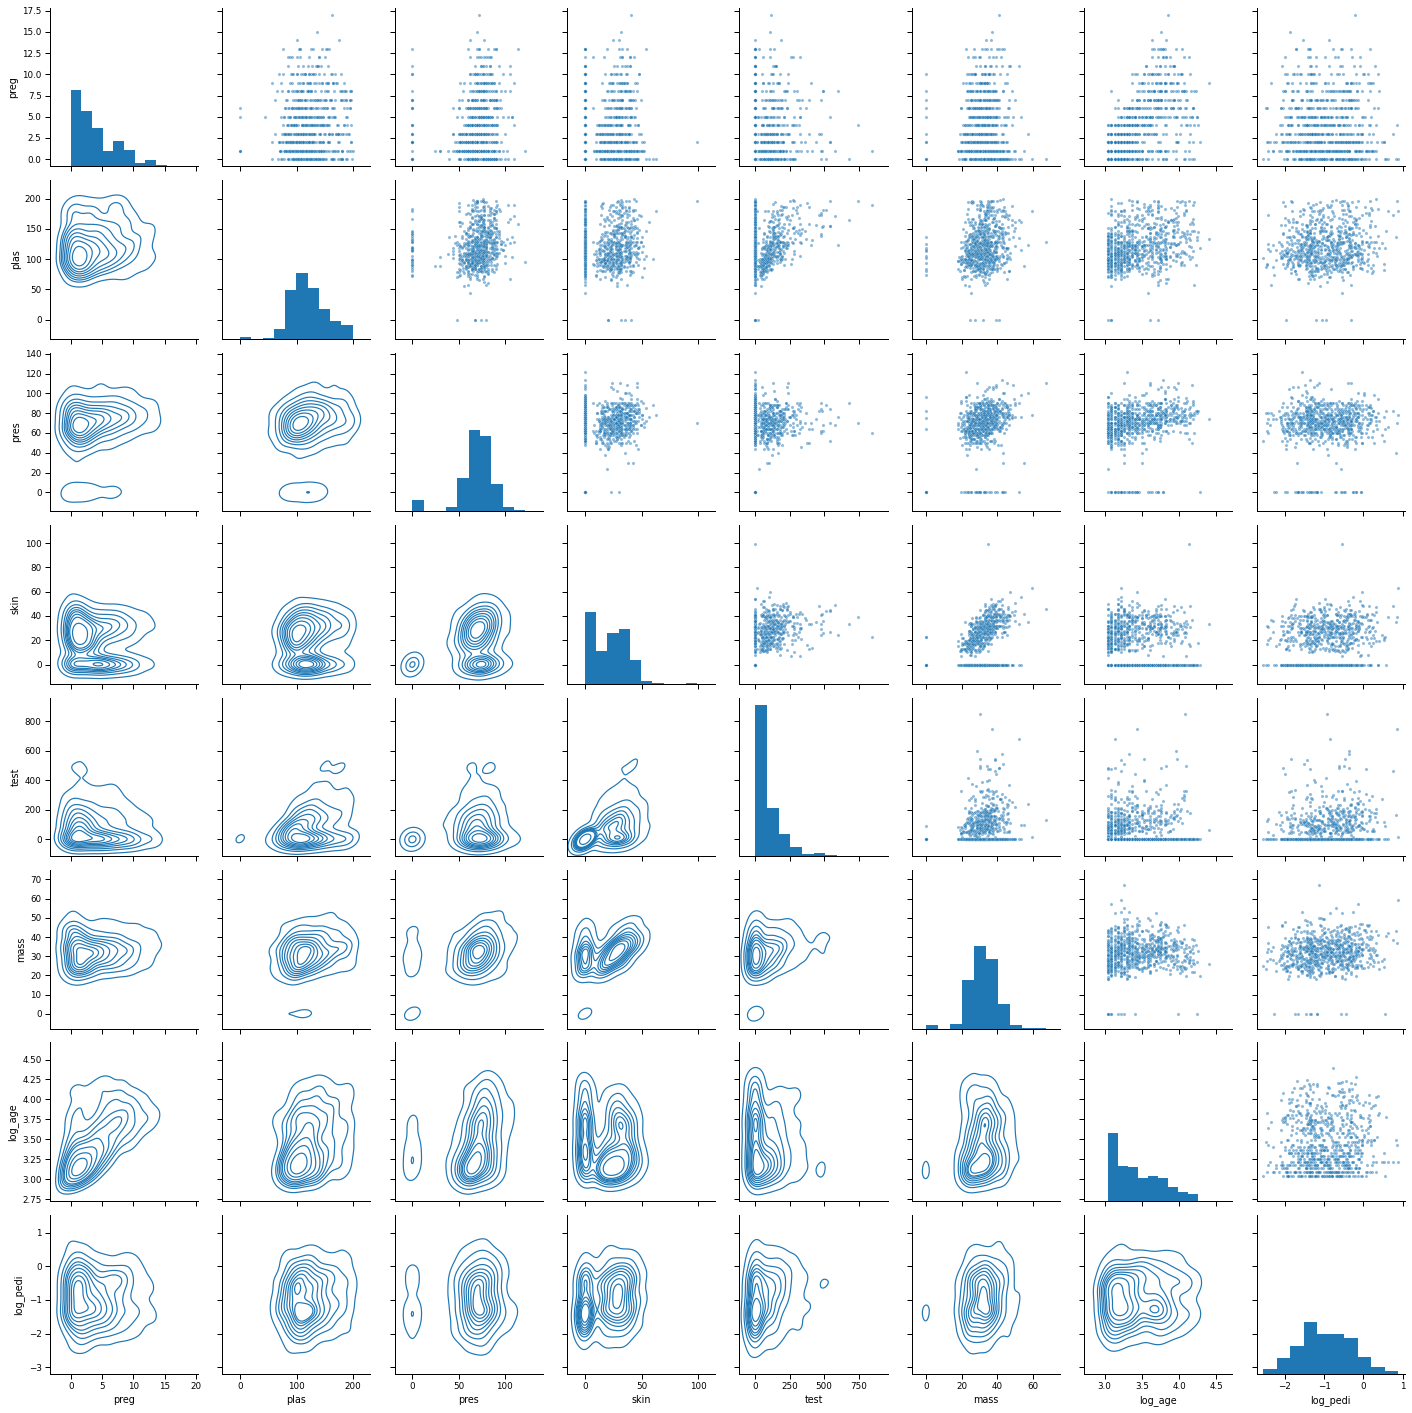

In [ ]:
sns.set_context('paper')
g = sns.PairGrid(pima2)
g.map_upper(sns.scatterplot, linewidths=1, edgecolor="w", s=10,
alpha=0.5)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot)
plt.show()

In [ ]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv',header=None,names=names)


# Data Pre processing

1.   Rescale data
2.   Standardize data
1.   Normalize
2.   Binarize

In [ ]:
# rescale
from sklearn.preprocessing import MinMaxScaler

In [ ]:
pima.head(2)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0


In [ ]:
X=np.array(pima.iloc[:,0:8])
Y=np.array([pima['class']])

In [ ]:
pima.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [ ]:
from numpy import set_printoptions
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)

In [ ]:
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


## Normalize data

In [ ]:
from sklearn.preprocessing import Normalizer
X=np.array(pima.iloc[:,0:8])
Y=np.array([pima['class']])
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


**Binarize Data (Make Binary)**

You can transform your data using a binary threshold. All values above the threshold are
marked 1 and all equal to or below are marked as 0. This is called binarizing your data or
thresholding your data. It can be useful when you have probabilities that you want to make crisp
values. It is also useful when feature engineering and you want to add new features that indicate
something meaningful.

In [ ]:
# binarization
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


# **8 Feature Selection For Machine Learning**
1 . Univarite Selection (eg Chi-square correllation)

2 . Recursive Feature Elimination

2 . Principle component analysis 

3 . Feature Importance

## Feauture Selection Chi-square correllation 
https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223 

Degrees of freedom refers to the maximum number of logically independent values, which have the freedom to vary. In simple words, it can be defined as the total number of observations minus the number of independent constraints imposed on the observations.
Let’s consider a scenario where we need to determine the relationship between the independent category feature (predictor) and dependent category feature(response). In feature selection, we aim to select the features which are highly dependent on the response.
When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect. In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.


Chi-Square Test for Feature Selection
A chi-square test is used in statistics to test the independence of two events. Given the data of two variables, we can get observed count O and expected count E. Chi-Square measures how expected count E and observed count O deviates each other.

https://stats.stackexchange.com/questions/253086/selectkbest-feature-selection-python-scikit-learn 


### Kbest library.

It takes as a parameter a score function, which must be applicable to a pair (X, y). The score function must return an array of scores, one for each feature X[:,i] of X (additionally, it can also return p-values, but these are neither needed nor required). SelectKBest then simply retains the first k features of X with the highest scores.

So, for example, if you pass chi2 as a score function, SelectKBest will compute the chi2 statistic between each feature of X and y (assumed to be class labels). A small value will mean the feature is independent of y. A large value will mean the feature is non-randomly related to y, and so likely to provide important information. Only k features will be retained.

Finally, SelectKBest has a default behaviour implemented, so you can write select = SelectKBest() and then call select.fit_transform(X, y) (in fact I saw people do this).

In [ ]:
X = pima.iloc[:,0:8]
Y = pima.iloc[:,8]

In [ ]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])


[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


 ## Recursive Feature Elimination
 Since RFE trains the given model on the full dataset every time it drops a feature, the computation time will be heavy for large datasets with many features as ours. To control this behavior, RFE provides step parameter that lets us drop an arbitrary number of features in each iteration instead of one

In [ ]:
pima.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data

array = pima.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = LogisticRegression()
#rfe = RFE(model, 3)
rfe = RFE(estimator=model, 
          n_features_to_select=10, step=10)
fit = rfe.fit(X, Y)

In [ ]:
print("Num Features: {}".format(fit.n_features_))
print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

Num Features: 8
Selected Features: [ True  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1]


## Reducing features using PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance:{}".format(fit.explained_variance_ratio_))
print(fit.components_)

Explained Variance:[0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


(array([[2., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 2., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 3., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 2., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 2., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 2., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 3., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 2., 0., 0., 0., 1.]]),
 array([-0.972, -0.776, -0.579, -0.383, -0.186,  0.01 ,  0.207,  0.404,
         0.6  ,  0.797,  0.993]),
 <a list of 8 Lists of Patches objects>)

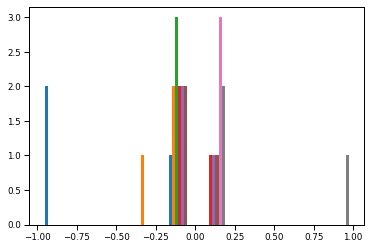

In [ ]:
plt.hist(np.sort(fit.components_))

## Feature importance using Extra tree classifier

https://www.geeksforgeeks.org/ml-extra-tree-classifier-for-feature-selection/

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.11  0.24  0.095 0.079 0.075 0.142 0.122 0.136]


# 9 Evaluate the Performance of Machine
# Learning Algorithms with Resampling

# 10
# Machine Learning Algorithm Performance Metrics

# Classification Metrics

##1 Classification Accuracy.

##2 Logarithmic Loss.

##3 Area Under ROC Curve. : 

For binary classification problem. ROC=1 is perfect. ROC=0.5 means half of the classes predicted correctly

##4 Confusion Matrix.

##5 Classification Report.

#**Regression Metrics**

**Mean Absolute Error.**

** Mean Squared Error.**

** R2.**

The R2 (or R Squared) metric provides an indication of the goodness of t of a set of predictions
to the actual values. In statistical literature this measure is called the coecient of determination.
This is a value between 0 and 1 for no-t and perfect t respectively. The example below
provides a demonstration of calculating the mean R2 for a set of predictions.